In [1]:

import mysql.connector

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='sprint4')



Exercici 1: Realitzem un gràfic de densitat del Amount a través de la llibreria de seaborn, aquest en la majoria de casos està comprés entre 50 i 450$ entr aquests valors és manté estable la quantitat exceptuant un pic entre els 350$ i 450$ on trobarem un major nombre de comandes compresa entre aquests valors.

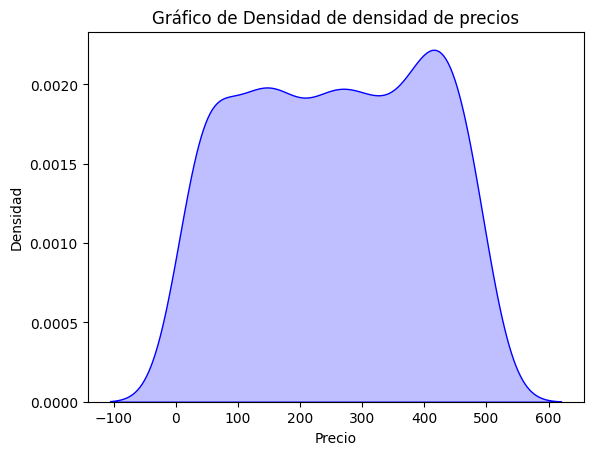

In [41]:
# Exercici 1 una variable numèrica
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import mysql.connector

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='sprint4')

query_t = """
select *
from transactions;"""

# Llegeix les dades de la consulta SQL


df_trans = pd.read_sql(query_t, cnx)

# Extreu dades per a la gràfica
x = df_trans['amount']

# Crear el gráfico de densidad
sns.kdeplot(x, shade=True, color="blue")

# Añadir títulos y etiquetas
plt.title('Gráfico de Densidad de densidad de precios')
plt.xlabel('Precio')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

Exercici 2 Dos variables numèriques. selecionem el preu i el pes dels productes i plotejem un gràfic de dispersió entre les dues variables amb la seva línea de correlació. Com es pot observar hi ha una petita tendéncia a més preu més pes del producte però res significatiu, hi ha una correlació positiva, 0,11 però es molt baixa.

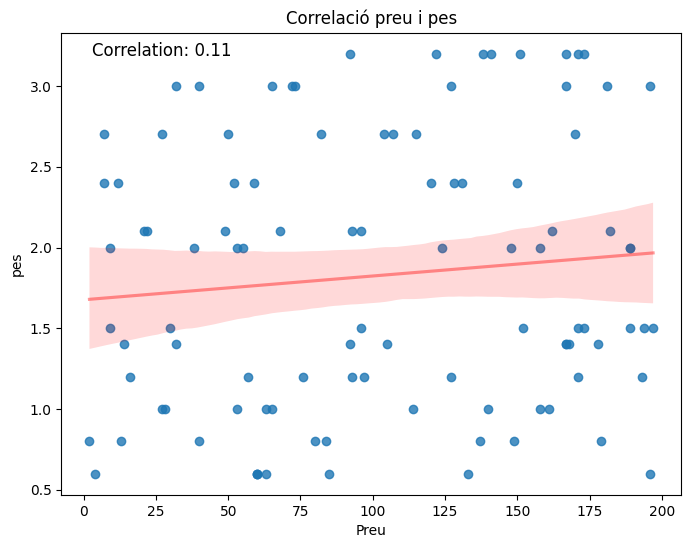

In [31]:
#Exercici 2 Dos variables numèriques.

# library
import seaborn as sns
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignorar advertències
warnings.filterwarnings('ignore')

query = """
select price, weight
from products1
"""

# Llegeix les dades de la consulta SQL
data = pd.read_sql(query, cnx)

#calculem la variabla correlació
correlacio = data["price"].corr(data["weight"])

#Plotejem el gràfic de dispersó amb la línea de correlació en vermell
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=data["price"],
    y=data["weight"],
    line_kws={
        "color": "r",
        "alpha": 0.4
    },
    ax=ax
)
# Etiquetes i títol
plt.ylabel('Pes')
plt.xlabel('Preu')
plt.title('Correlació preu i pes')

# Afegim al gràfic la variable correlació
ax.annotate(f'Correlation: {correlacio:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
            fontsize=12, backgroundcolor='white')

plt.show()

Exercici 3: En aquets exercici observem la quantitat d'empreses que hi ha a cada país, tenint poca representativitat d'Espanya, China i França. I una alta representativitat de diversos països com Països baixos, Suécia, Italia, EUA, Bèlgica, UK.

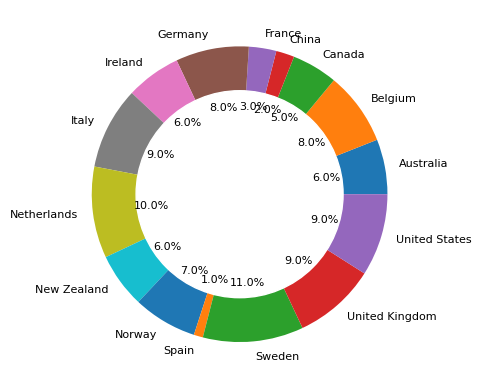

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector

# Conexión a la base de datos
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='sprint4')

# Consulta SQL
query_3 = """SELECT * FROM companies"""

# Leer datos de la consulta SQL en un DataFrame de pandas
df_country = pd.read_sql(query_3, cnx)

# Agrupar por país y contar el número de ocurrencias
grouped_data = df_country.groupby('country').size().reset_index(name='num')

# Extraer nombres de países y tamaños
names = grouped_data['country']
size = grouped_data['num']

# Crear un círculo en el centro del gráfico
my_circle = plt.Circle((0, 0), 0.7, color='white')

# Crear el gráfico de pastel
plt.pie(size, autopct='%1.1f%%', labels=names, textprops={'fontsize': 8})

# Añadir el círculo al gráfico
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.size = (20, 10)
plt.title('Empreses per país')
# Mostrar el gráfico
plt.show()


Exercici 4: realitzem un gràfic de barres amb matplotlib dels 10 màxims amounts per usuari, observem una gran variació de més de 17500 $ ente el primer usuari del grup fins l'últim que disminueïx fins als 1500 $. Trobem 3 esglaonats el primer entre el primer usuari id 272 i els segünts, posteriorment trobem 3 usuaris amb uns valors del amount relativament pròxims ids (267, 275, 92) amb amounts compresos entre 12800 i 11000, decreix fins aproximadament els 3000$ i fa un salt on trobem els últims 3 usuaris amb valors molt semblans vora els 1000$.

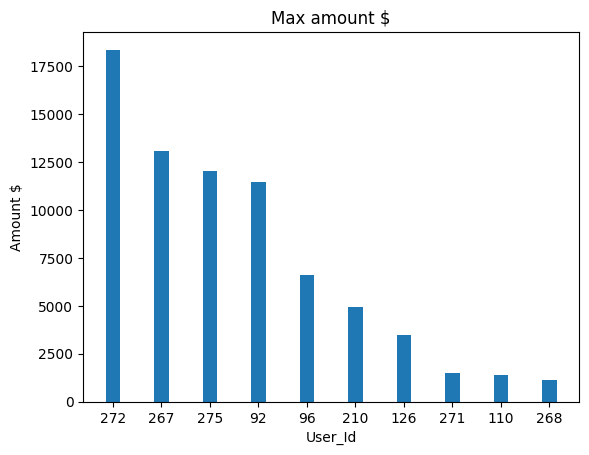

In [1]:
# Exercici 4 Una variable categorica una numérica.
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignorar advertències
warnings.filterwarnings('ignore')

# Paràmetres de connexió
import mysql.connector

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='sprint4')


# Connexió a la base de dades
query = """
select user_id, sum(amount) as am
from transactions
group by user_id
order by am desc
limit 10;
"""

# Llegeix les dades de la consulta SQL
data = pd.read_sql(query, cnx)

# Extreu dades per a la gràfica
x = data['user_id']
y = data['am']

# Crea la gràfica de barres
plt.bar(x, y, width=0.3)

# Etiquetes i títol
plt.ylabel('Amount $')
plt.xlabel('User_Id')
plt.title('Max amount $')

# Mostra la gràfica
plt.show()


Exercici 5: Classifiquem les ciutats per país amb un treemap observem aquelles amb el nom més gran el seu count d'usuaris també ho és. Igual que l'exercici anterior tenim els 3 països USA, Canada  i UK, amb aquest mateix ordre trobem més quantitat de ciutats en el primer país mencionat i menor quantitat a l'úlim, UK. Així com la quantitat d'usuaris 150, 75, 50. Les ciutats amb més usuaris són Columbus amb 6, San Jose 5, Aurora i Lewiston 4, d'USA, a Canadà trobem max 3 usuaris en 2 ciutats i en UK també max 3 en una ciutat (March).

In [59]:
# Exercici 5 Dues variables categòriques.
import pandas as pd
import plotly.express as px
import sqlite3

# Conectar a la base de datos SQLite (ajusta esto según tu base de datos real)
import mysql.connector

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='sprint4')

# Consulta SQL para contar la cantidad de usuarios por ciudad y país
query = """
SELECT country, city, COUNT(id) as user_count
FROM users
GROUP BY country, city
"""

# Leer datos de la consulta SQL en un DataFrame de pandas
df = pd.read_sql_query(query, cnx)


# Crear el treemap con plotly
fig = px.treemap(df, path=['country', 'city'], values='user_count',
                 title='Distribución de Usuarios por Ciudad y País')

# Mostrar el treemap
fig.show()


In [58]:
pip install plotly.express

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.4 MB 2.2 MB/s eta 0:00:08
    --------------------------------------- 0.4/16.4 MB 4.6 MB/s eta 0:00:04
   - -------------------------------------- 0.8/16.4 MB 5.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/16.4 MB 7.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/16.4 MB 7.6 MB/s eta 0:00:02
   ----- ---------------------------------- 2.2/16.4 MB 8.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/16.4 MB 8.3 MB/s eta 0:00:02
   ------- -------------------------------- 3.1/16.4 MB 8.6 MB/s eta 0:00:02
   -------- ------------------------------- 3.6/16.4 MB 8.8 MB/s eta 0:00:02
   --------- ------------------------------ 4.1/16.4 MB 9.0 MB/s eta 0:00:02
   ---------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Exercici 6:  Classifiquem els usuaris en dues variables categóriques el país, la ciutat i una numerica la quantitat d'usuaris, mostrem quan hi ha més de dos usuaris en aquesta ciutat. Tenint 6 ciutats a Canda amb 2 usuaris i 2 amb 3 usuaris.

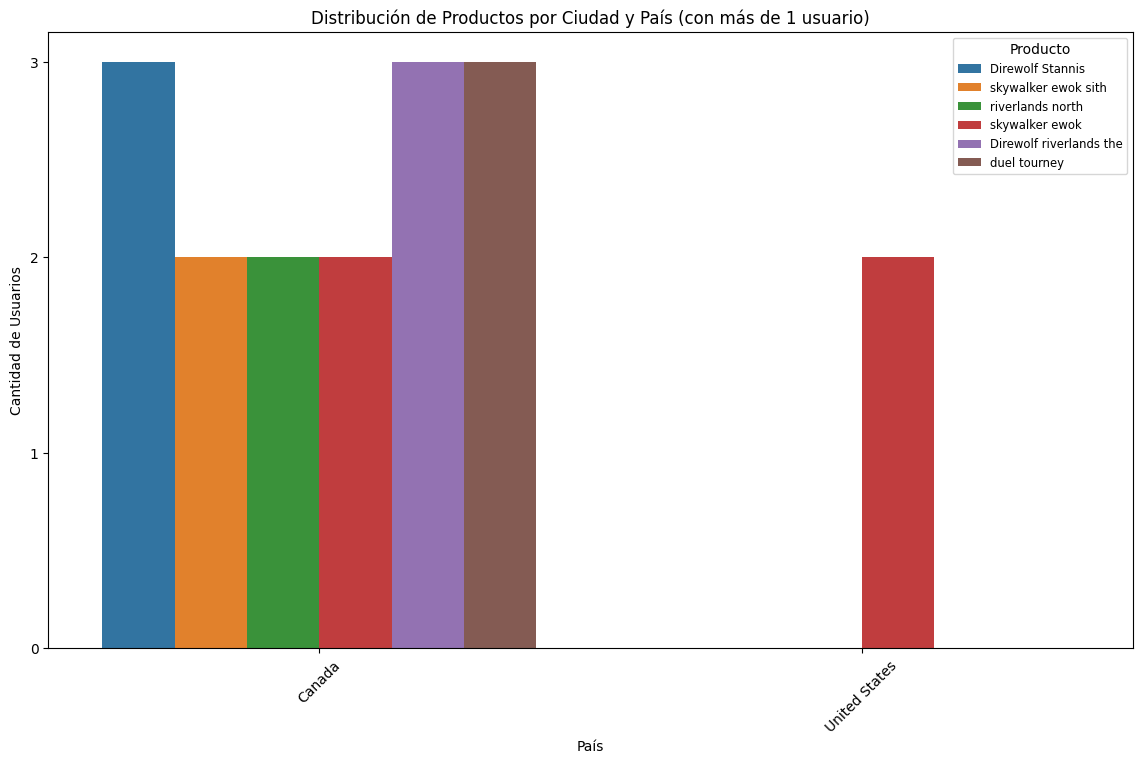

In [29]:
# Exercici 6 Tres variables.

import pandas as pd
import plotly.express as px
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos SQLite (ajusta esto según tu base de datos real)
import mysql.connector

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='sprint4')

query = """
SELECT u.country, u.city, p.product_name, COUNT(u.id) as user_count
FROM users u
JOIN transactions t ON u.id = t.user_id
JOIN products1 p ON p.id = t.product_ids
GROUP BY u.country, u.city, p.product_name
HAVING COUNT(u.id) > 1
"""

# Leer datos de la consulta SQL en un DataFrame de pandas
df = pd.read_sql_query(query, cnx)


# Crear el gráfico de barras apiladas con seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='country', y='user_count', hue='product_name', ci=None)

# Añadir títulos y etiquetas
plt.title('Distribución de Productos por Ciudad y País (con más de 1 usuario)')
plt.xlabel('País')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Ajustar el tamaño de la fuente de la leyenda
plt.legend(title='Producto', fontsize='small', title_fontsize='medium')

# Configurar los ticks del eje y para mostrar solo los valores enteros sin los intermedios
y_max = df['user_count'].max()
plt.yticks(ticks=range(0, y_max + 1))

# Mostrar el gráfico
plt.show()

 Exercici 7 Grafiquem un Pairplot de diferents variables com la latitud, longitud, amount i age. Observem una gran distribució des d'on es fan les compres ja que els gràfics de lat i long estàn plens de punts en tots el rang de valors, en el cas de la edat veiem 3 edats que despunten els 33, 41 i 42. Per altra banda les transacions més altes les fan des de Canadà, seguit per USA i UK, tenint una variació entre els 2 primers de 200 dolars i entre els 2 últims d'uns 100.

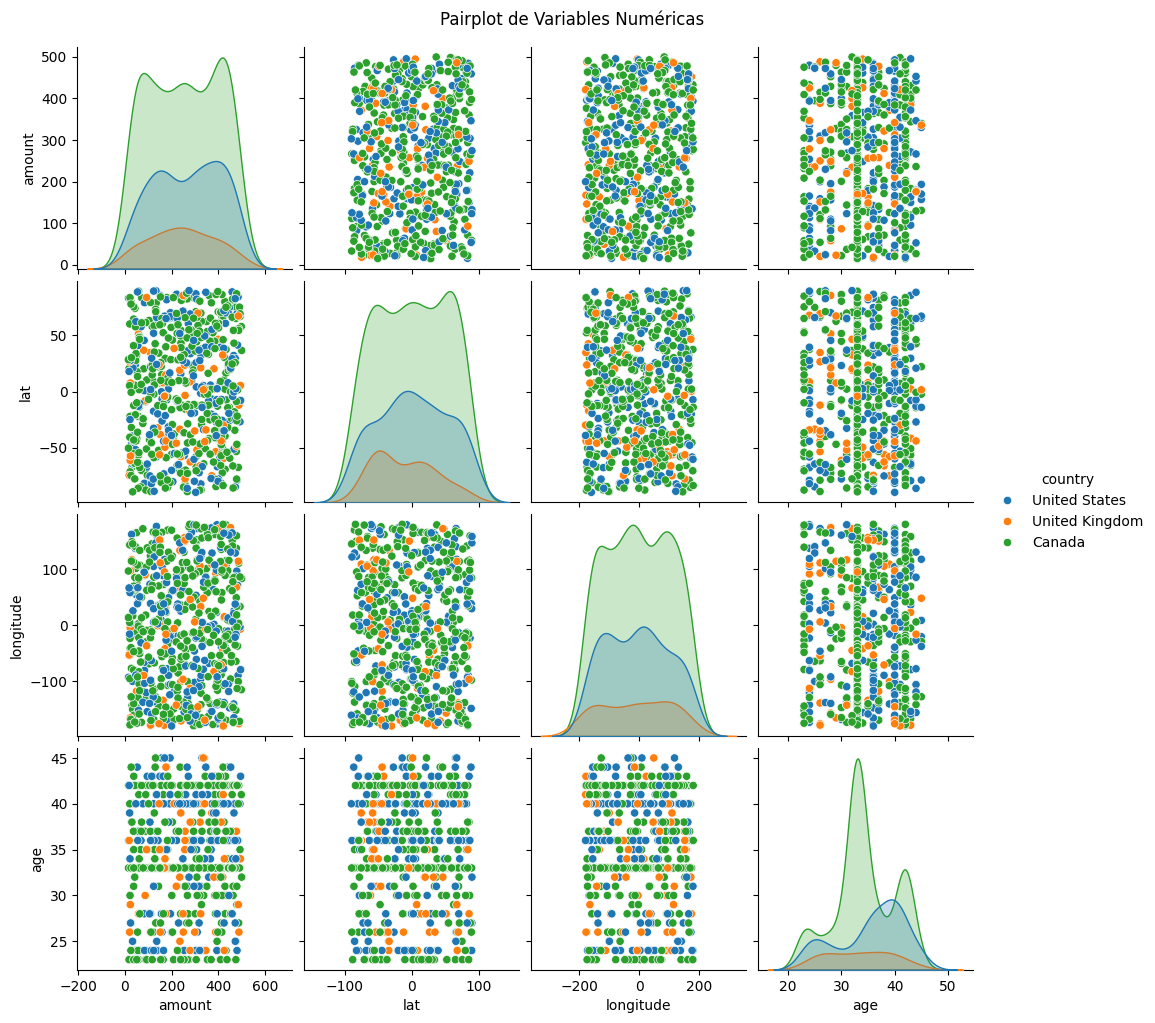

In [39]:
# Exercici 7 Graficar un Pairplot.

# Library
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Ignorar advertències
warnings.filterwarnings('ignore')

# Query
query = """
SELECT t.amount, t.lat, t.longitude, u.birth_date, u.country
FROM transactions t
JOIN users u ON t.user_id = u.id
WHERE t.amount IS NOT NULL AND t.lat IS NOT NULL AND t.longitude IS NOT NULL
"""

# Leer datos de la consulta SQL en un DataFrame de pandas
df = pd.read_sql_query(query, cnx)

# Convertir la columna 'birth_date' a tipo datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Filtrar filas con fechas de nacimiento nulas
df.dropna(subset=['birth_date'], inplace=True)

# Calcular la edad
current_year = datetime.now().year
df['age'] = current_year - df['birth_date'].dt.year

# Filtrar cualquier fila con valores nulos en las nuevas columnas
df.dropna(inplace=True)

# Crear el pairplot con seaborn, usando 'country' como la variable de color
sns.pairplot(df[['amount', 'lat', 'longitude', 'age', 'country']], hue='country')
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)

# Mostrar el gráfico
plt.show()
